In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

In [312]:
img_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=.2)

training_set = img_datagen.flow_from_directory(
        'PATH_TO_YOUR_DATASET_DIR',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
)

valid_set = img_datagen.flow_from_directory(
        'PATH_TO_YOUR_DATASET_DIR',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
)

Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [313]:
print(training_set.image_shape, valid_set.image_shape)
print(training_set.batch_size, valid_set.batch_size)
print(training_set.labels.shape, valid_set.labels.shape)

(64, 64, 3) (64, 64, 3)
32 32
(11976,) (2994,)


In [314]:
def img_set_as_arr(dataset):
    imgs = np.concatenate([dataset.next()[0] for i in range(len(dataset))])
    labels = np.concatenate([dataset.next()[1] for i in range(len(dataset))])
    return (imgs, labels)

In [315]:
train_imgs, train_labels = img_set_as_arr(training_set)
print(train_imgs.shape, train_labels.shape)

(11976, 64, 64, 3) (11976, 4)


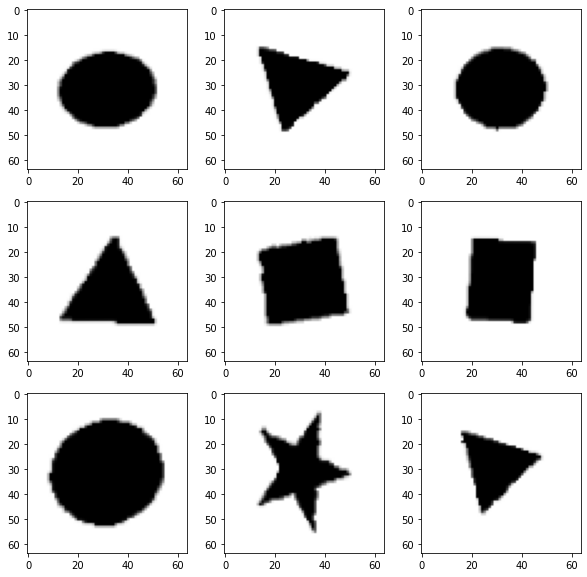

In [316]:
plt.figure(figsize=(10,10))
for i in range(9):
    img = train_imgs[i]
    label = train_labels[i]
    plt.subplot(3,3, i+1)
    plt.imshow(img)

In [317]:
valid_imgs, valid_labels = img_set_as_arr(test_set)
print(valid_imgs.shape, valid_labels.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/shapes-dataset\\circle\\1536.png'

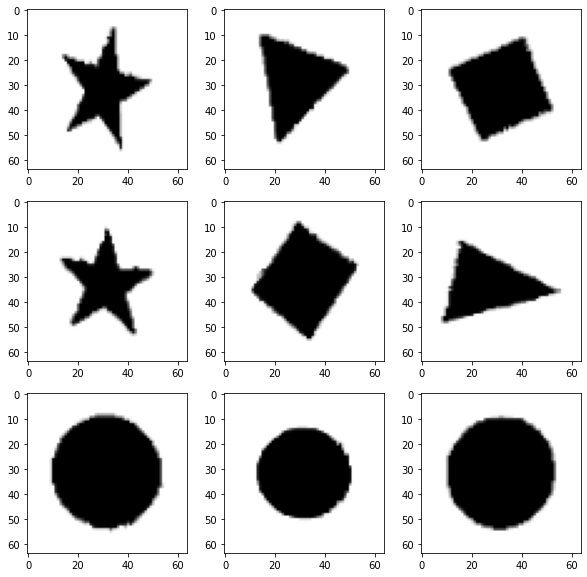

In [318]:
plt.figure(figsize=(10,10))
for i in range(9):
    img = valid_imgs[i]
    label = valid_imgs[i]
    plt.subplot(3,3, i+1)
    plt.imshow(img)

# Building the CNN

In [319]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Training the CNN

In [320]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [321]:
cnn.fit(training_set, validation_data=valid_set, epochs = 10)

Epoch 1/10
375/375 [==============================] - 40s 104ms/step - loss: 0.1234 - accuracy: 0.9573 - val_loss: 0.0081 - val_accuracy: 0.9977
Epoch 2/10
375/375 [==============================] - 42s 111ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9987
Epoch 3/10
375/375 [==============================] - 38s 103ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 4.5268e-04 - val_accuracy: 0.9997
Epoch 4/10
375/375 [==============================] - 40s 105ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0140 - val_accuracy: 0.9963
Epoch 5/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 3.9638e-04 - val_accuracy: 1.0000
Epoch 6/10
375/375 [==============================] - 37s 99ms/step - loss: 2.5038e-04 - accuracy: 0.9999 - val_loss: 3.9450e-04 - val_accuracy: 0.9997
Epoch 7/10
375/375 [==============================] - 36s 96ms/step - loss: 1.7985e-04 - accuracy: 1.0000 - val_los

# Testing the CNN Model

In [322]:
from keras.preprocessing import image

In [323]:
def predict_img_class(img_path):
    img = image.load_img(img_path, target_size=(64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result = cnn.predict(img / 255.0)[0]
    classes = list(training_set.class_indices)
    prob_dist = {}
    for i in range(len(result)):
        prob_dist[classes[i]] = (result[i] * 100).round(2)
    return (classes, prob_dist)

In [359]:
classes, prob_dis = predict_img_class('PATH_TO_IMAGE_YOU_WANT_TO_TEST')
print('Probability of Each Shape: \n', prob_dis)

Probability of Each Shape: 
 {'circle': 0.0, 'square': 0.0, 'star': 100.0, 'triangle': 0.0}


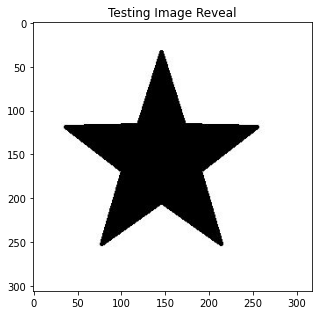

In [361]:
plt.figure(figsize=(5,5))
plt.imshow(plt.imread('PATH_TO_IMAGE_YOU_WANT_TO_TEST'))
plt.title('Testing Image Reveal')
plt.show()